# Importing libraries

In [70]:
import sys 
import sklearn

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

# Loading and splitting dataset

In [71]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [72]:
from sklearn.model_selection import train_test_split

train , test = train_test_split(titanic , train_size = 0.8 , random_state = 25)

# Data Exploration

In [73]:
train.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
410,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
638,0,3,female,41.0,0,5,39.6875,S,Third,woman,False,NaN,Southampton,no,False
395,0,3,male,22.0,0,0,7.7958,S,Third,man,True,NaN,Southampton,no,True
221,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
800,0,2,male,34.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
478,0,3,male,22.0,0,0,7.5208,S,Third,man,True,NaN,Southampton,no,True
538,0,3,male,NaN,0,0,14.5000,S,Third,man,True,NaN,Southampton,no,True
762,1,3,male,20.0,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,yes,True
163,0,3,male,17.0,0,0,8.6625,S,Third,man,True,NaN,Southampton,no,True
211,1,2,female,35.0,0,0,21.0000,S,Second,woman,False,NaN,Southampton,yes,True


In [74]:
test.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
760,0,3,male,NaN,0,0,14.5000,S,Third,man,True,NaN,Southampton,no,True
773,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
266,0,3,male,16.0,4,1,39.6875,S,Third,man,True,NaN,Southampton,no,False
507,1,1,male,NaN,0,0,26.5500,S,First,man,True,NaN,Southampton,yes,True
524,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
169,0,3,male,28.0,0,0,56.4958,S,Third,man,True,NaN,Southampton,no,True
189,0,3,male,36.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
360,0,3,male,40.0,1,4,27.9000,S,Third,man,True,NaN,Southampton,no,False
691,1,3,female,4.0,0,1,13.4167,C,Third,child,False,NaN,Cherbourg,yes,False
335,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [75]:
train.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,0.386236,2.334270,29.246066,0.540730,0.400281,30.842128
std,0.487228,0.825443,14.503472,1.134313,0.830942,47.270804
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.254150
75%,1.000000,3.000000,37.000000,1.000000,0.000000,30.070800
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [76]:
train.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
410,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
638,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
395,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
221,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
800,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
143,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
474,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
318,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Data Manipulation and Preprocessing

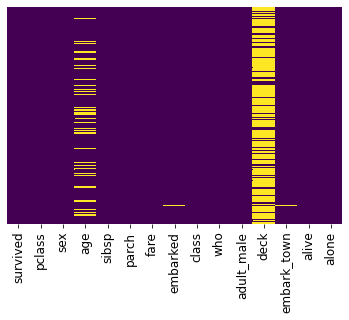

In [77]:
#WE need to eliminate the null values for that we will use heatmap to determine the null vaues  

import seaborn as sns

sns.heatmap(train.isnull(),yticklabels = False , cbar=False,cmap='viridis')

In [78]:
train.drop('deck',axis=1 , inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [79]:
train.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
410,0,3,male,NaN,0,0,7.8958,S,Third,man,True,Southampton,no,True
638,0,3,female,41.0,0,5,39.6875,S,Third,woman,False,Southampton,no,False
395,0,3,male,22.0,0,0,7.7958,S,Third,man,True,Southampton,no,True
221,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
800,0,2,male,34.0,0,0,13.0000,S,Second,man,True,Southampton,no,True


# Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


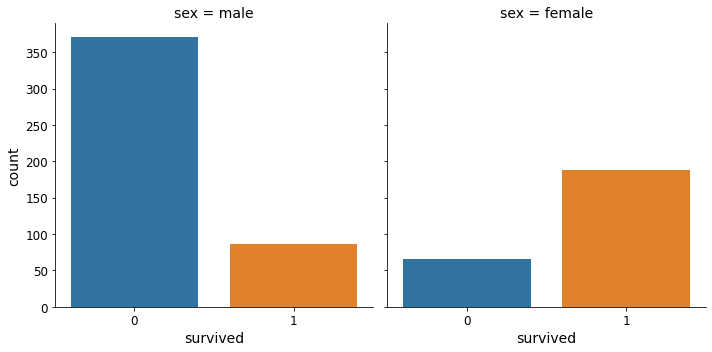

In [80]:
sns.factorplot(x = 'survived',col='sex',kind='count',data=train)


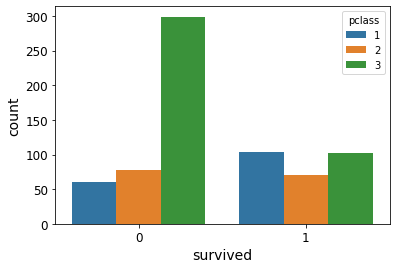

In [81]:
sns.countplot(x = 'survived', hue='pclass' , data=train)

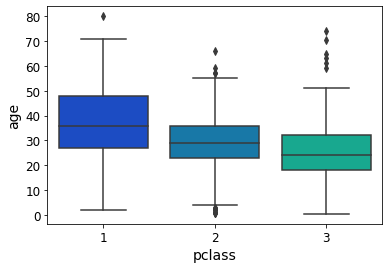

In [82]:
sns.boxplot(x = 'pclass' , y='age' , data=train , palette='winter')

# Preparing the data

In [83]:
train = train.copy()
test = test.copy()
train = pd.get_dummies(train , columns=['embarked', 'pclass'] , drop_first=True)
test = pd.get_dummies(test , columns=['embarked', 'pclass'] , drop_first=True)

In [84]:
train.sex = train.sex.astype('category').cat.codes
test.sex = test.sex.astype('category').cat.codes

In [85]:
mean_age = train.age.mean()

In [86]:
print(mean_age)

29.246066433566433


In [87]:
train['age'].fillna(train['age'].median(),inplace = True)

In [88]:
train.head(7)

,survived,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,embarked_Q,embarked_S,pclass_2,pclass_3
410,0,1,28.0,0,0,7.8958,Third,man,True,Southampton,no,True,0,1,0,1
638,0,0,41.0,0,5,39.6875,Third,woman,False,Southampton,no,False,0,1,0,1
395,0,1,22.0,0,0,7.7958,Third,man,True,Southampton,no,True,0,1,0,1
221,0,1,27.0,0,0,13.0000,Second,man,True,Southampton,no,True,0,1,1,0
800,0,1,34.0,0,0,13.0000,Second,man,True,Southampton,no,True,0,1,1,0
478,0,1,22.0,0,0,7.5208,Third,man,True,Southampton,no,True,0,1,0,1
538,0,1,28.0,0,0,14.5000,Third,man,True,Southampton,no,True,0,1,0,1


In [89]:
mean_age_test = test['age'].mean()
print(mean_age_test)
test['age'].fillna(test['age'].median(),inplace = True)

31.524084507042254


In [90]:
train['fare'].fillna(train['fare'].median(),inplace = True)

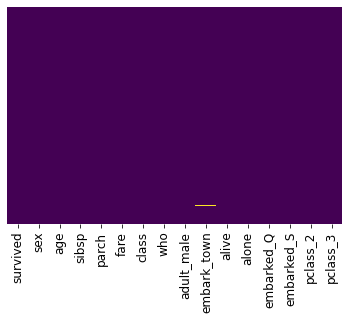

In [91]:
sns.heatmap(train.isnull(),yticklabels = False , cbar=False,cmap='viridis')

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 410 to 132
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     712 non-null    int64   
 1   sex          712 non-null    int8    
 2   age          712 non-null    float64 
 3   sibsp        712 non-null    int64   
 4   parch        712 non-null    int64   
 5   fare         712 non-null    float64 
 6   class        712 non-null    category
 7   who          712 non-null    object  
 8   adult_male   712 non-null    bool    
 9   embark_town  711 non-null    object  
 10  alive        712 non-null    object  
 11  alone        712 non-null    bool    
 12  embarked_Q   712 non-null    uint8   
 13  embarked_S   712 non-null    uint8   
 14  pclass_2     712 non-null    uint8   
 15  pclass_3     712 non-null    uint8   
dtypes: bool(2), category(1), float64(2), int64(3), int8(1), object(3), uint8(4)
memory usage: 75.7+ KB


In [93]:
train.head(5)

,survived,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,embarked_Q,embarked_S,pclass_2,pclass_3
410,0,1,28.0,0,0,7.8958,Third,man,True,Southampton,no,True,0,1,0,1
638,0,0,41.0,0,5,39.6875,Third,woman,False,Southampton,no,False,0,1,0,1
395,0,1,22.0,0,0,7.7958,Third,man,True,Southampton,no,True,0,1,0,1
221,0,1,27.0,0,0,13.0000,Second,man,True,Southampton,no,True,0,1,1,0
800,0,1,34.0,0,0,13.0000,Second,man,True,Southampton,no,True,0,1,1,0


In [94]:
train.drop(['who' , 'adult_male' , 'embark_town' , 'alive' , 'alone' ] ,axis=1, inplace=True)

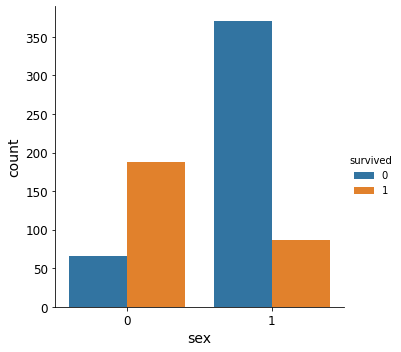

In [95]:
sns.catplot(x ='sex' ,hue='survived' , kind='count' , data=train)

In [96]:
train.drop(['class'] , axis = 1 , inplace=True)

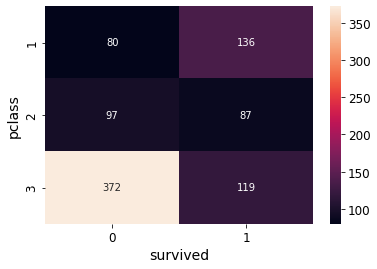

In [97]:
group = titanic.groupby(['pclass','survived'])
pclass_survived = group.size().unstack()

sns.heatmap(pclass_survived , annot = True , fmt = 'd')

In [98]:
corr = train.corr(method='pearson')
corr

,survived,sex,age,sibsp,parch,fare,embarked_Q,embarked_S,pclass_2,pclass_3
survived,1.000000,-0.541332,-0.089116,-0.047591,0.065737,0.249790,0.018960,-0.155951,0.091258,-0.307551
sex,-0.541332,1.000000,0.077206,-0.099982,-0.241261,-0.208940,-0.111829,0.130334,-0.059264,0.148096
age,-0.089116,0.077206,1.000000,-0.250421,-0.175969,0.093104,-0.021808,-0.027720,0.008168,-0.269060
sibsp,-0.047591,-0.099982,-0.250421,1.000000,0.414670,0.173368,-0.037663,0.080432,-0.064210,0.102842
parch,0.065737,-0.241261,-0.175969,0.414670,1.000000,0.245426,-0.073169,0.063270,-0.026017,0.022123
fare,0.249790,-0.208940,0.093104,0.173368,0.245426,1.000000,-0.110135,-0.152588,-0.116085,-0.411826
embarked_Q,0.018960,-0.111829,-0.021808,-0.037663,-0.073169,-0.110135,1.000000,-0.495696,-0.118018,0.216185
embarked_S,-0.155951,0.130334,-0.027720,0.080432,0.063270,-0.152588,-0.495696,1.000000,0.181335,0.014382
pclass_2,0.091258,-0.059264,0.008168,-0.064210,-0.026017,-0.116085,-0.118018,0.181335,1.000000,-0.581679
pclass_3,-0.307551,0.148096,-0.269060,0.102842,0.022123,-0.411826,0.216185,0.014382,-0.581679,1.000000


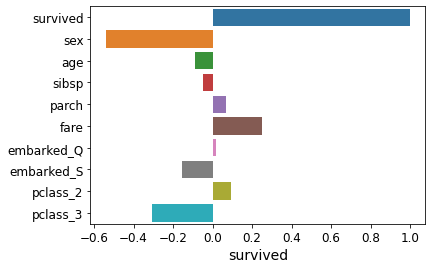

In [99]:
sns.barplot(x =corr.survived , y = corr.columns)

In [100]:
x = train.drop('survived' , axis =1)
y = train['survived']

In [101]:
train_x,test_x,train_y,test_y = train_test_split(x,y ,random_state= 42)


In [102]:
index = test_x.index
print(len(index))

178


In [103]:
train_x.head(5)

,sex,age,sibsp,parch,fare,embarked_Q,embarked_S,pclass_2,pclass_3
108,1,38.0,0,0,7.8958,0,1,0,1
616,1,34.0,1,1,14.4000,0,1,0,1
656,1,28.0,0,0,7.8958,0,1,0,1
328,0,31.0,1,1,20.5250,0,1,0,1
467,1,56.0,0,0,26.5500,0,1,0,0


# Model Building

In [104]:
#Implementing titanic dataset using Linear Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression(solver='liblinear')
logreg.fit(train_x,train_y)
prediction = logreg.predict(test_x)
score = cross_val_score(logreg , train_x,train_y, cv = 5)
print("Score using Logistic Regression :" , score*100)
acc_log = round(logreg.score(train_x,train_y) * 100 , 2)
acc_log

Score using Logistic Regression : [83.17757009 77.57009346 80.37383178 80.37383178 83.96226415]


81.65

In [105]:
 #implementing titanic dataset using Decision Tree
 from sklearn.tree import DecisionTreeClassifier
 desclr = DecisionTreeClassifier(random_state= 4)
 desclr.fit(train_x,train_y)
 predicition_desclr = desclr.predict(test_x)
 score = cross_val_score(desclr,train_x,train_y,cv = 5)
 print("score : " ,score*100 )
 acc_log_desclr = round(desclr.score(train_x,train_y)*100, 2)
 print(round(score.mean()*100, 2))

score :  [79.43925234 75.70093458 79.43925234 74.76635514 81.13207547]
78.1


#Fine Tuning 


In [106]:
#x = train_df['PassengerId','Pclass','Sex','Age','Parch','Fare','Cabin','Embarked','PassengerType','FamilySize']
y_new = train['survived']
X_new = train.drop('survived', axis = 1)
X_new = train.drop('sibsp', axis = 1)

In [107]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [108]:
kfold = StratifiedKFold(n_splits=10)

In [109]:
random_state = 2
DTC = DecisionTreeClassifier(random_state= random_state)


dtc_param_grid = {'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]}

gsDTC = GridSearchCV(DTC,param_grid = dtc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsDTC.fit(train_x,train_y)

DTC_best = gsDTC.best_estimator_

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    4.9s finished


In [110]:
gsDTC.best_score_ *100

83.53249475890985